In [3]:
import pandas as pd
df = pd.read_pickle("../data/training_df")

In [4]:
df.head()

,cr,feat_04_syn,feat_20_syn,feat_26_syn,feat_15_syn,feat_35_syn,feat_10_syn,feat_12_syn,feat_13_syn,feat_24_syn,...,feat_22_mm,feat_23_mm,feat_30_mm,feat_33_mm,feat_34_mm,feat_36_mm,feat_38_mm,feat_40_mm,feat_41_mm,feat_47_mm
0,0.818182,0,0,0,0,0,0,0,0,0,...,0.000000,0.009756,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.001747
1,0.755102,0,0,0,0,0,0,0,0,0,...,0.000000,0.014634,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.257576,0,0,0,0,0,0,0,0,0,...,0.044776,0.039024,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.026201
3,0.381818,0,0,0,0,0,0,0,0,0,...,0.014925,0.024390,0.0,0.009524,0.010417,0.0,0.0,0.0,0.007407,0.006114
4,0.870968,0,0,0,0,0,0,0,0,0,...,0.000000,0.019512,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.018341


In [5]:
df.iloc[0,:]

cr             0.818182
feat_04_syn    0.000000
feat_20_syn    0.000000
feat_26_syn    0.000000
feat_15_syn    0.000000
feat_35_syn    0.000000
feat_10_syn    0.000000
feat_12_syn    0.000000
feat_13_syn    0.000000
feat_24_syn    0.000000
feat_37_syn    0.000000
feat_03_syn    0.000000
feat_44_syn    0.000000
feat_27_syn    0.000000
feat_02_mm     0.000000
feat_06_mm     0.000000
feat_07_mm     0.008065
feat_08_mm     0.000000
feat_09_mm     0.006061
feat_11_mm     0.000000
feat_16_mm     0.000000
feat_17_mm     0.000000
feat_19_mm     0.000000
feat_21_mm     0.008475
feat_22_mm     0.000000
feat_23_mm     0.009756
feat_30_mm     0.000000
feat_33_mm     0.000000
feat_34_mm     0.000000
feat_36_mm     0.000000
feat_38_mm     0.000000
feat_40_mm     0.000000
feat_41_mm     0.000000
feat_47_mm     0.001747
Name: 0, dtype: float64

In [31]:
df.iloc[0,:].to_list()

[0.8181818181818182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008064516129032258,
 0.0,
 0.006060606060606061,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00847457627118644,
 0.0,
 0.00975609756097561,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0017467248908296944]

In [11]:
import joblib

In [13]:
model = joblib.load('../models/rfr_model.joblib')

C:\Users\ARosa\Miniconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ARosa\Miniconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


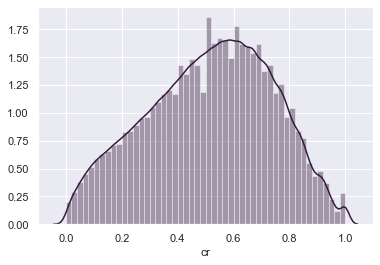

In [25]:
import seaborn as sns
sns.set(style="darkgrid", palette="rocket")
sns.distplot(df.cr)

In [29]:
sum(df.cr < 0.60)

629663

In [30]:
sum(df.cr > 0.60)

395050

In [14]:
import numpy as np
thres = np.unique([j for i in model.estimators_ for j in i.tree_.threshold])
np.sort(thres)[-10:]

array([0.33050847, 0.34110171, 0.35365853, 0.3707317 , 0.41707316,
       0.42105262, 0.42682926, 0.44146341, 0.5       , 0.63347459])

In [21]:
np.sort(thres)[-20:]

array([0.26666667, 0.2707317 , 0.27317072, 0.28292683, 0.28536585,
       0.29756097, 0.3029661 , 0.30508475, 0.30645162, 0.31567797,
       0.33050847, 0.34110171, 0.35365853, 0.3707317 , 0.41707316,
       0.42105262, 0.42682926, 0.44146341, 0.5       , 0.63347459])

In [24]:
np.sort(thres)[-70:]

array([0.11842106, 0.12076271, 0.12096774, 0.12227074, 0.12288136,
       0.12313433, 0.125     , 0.13056769, 0.13231441, 0.13333334,
       0.13771187, 0.13805971, 0.14104804, 0.14179105, 0.14473684,
       0.14552239, 0.14878049, 0.15121951, 0.15365854, 0.15625   ,
       0.15714286, 0.15853659, 0.16044776, 0.16060606, 0.16097561,
       0.16341463, 0.16666667, 0.16788321, 0.17073171, 0.17153285,
       0.17317073, 0.17560976, 0.1804878 , 0.18095239, 0.18248175,
       0.18292683, 0.18536586, 0.18855932, 0.19402985, 0.2       ,
       0.20127118, 0.20149254, 0.20522388, 0.20895522, 0.20909091,
       0.21774193, 0.23333334, 0.24364407, 0.24576271, 0.26059322,
       0.26666667, 0.2707317 , 0.27317072, 0.28292683, 0.28536585,
       0.29756097, 0.3029661 , 0.30508475, 0.30645162, 0.31567797,
       0.33050847, 0.34110171, 0.35365853, 0.3707317 , 0.41707316,
       0.42105262, 0.42682926, 0.44146341, 0.5       , 0.63347459])

The model is capable of classifying better or with more detail low completion rate forms rather than high completion rate forms by analyzing these thresholds.

In [38]:
model.estimators_[0].tree_.max_depth

6

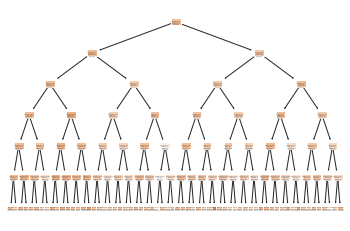

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 
plt.figure()
features = df.columns[1:]
_ = plot_tree(model.estimators_[0], feature_names=features, filled=True)
plt.savefig('../data/one_tree.eps',format='eps',bbox_inches = "tight")

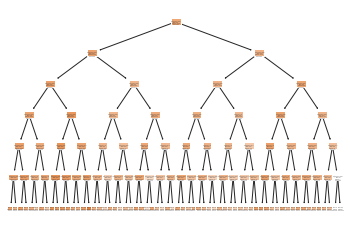

In [43]:
_ = plot_tree(model.estimators_[1], feature_names=features, filled=True)
plt.savefig('../data/second_tree.eps',format='eps')